In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Ruta del archivo
file_path = "/content/drive/My Drive/Tesis/DATASET/data_pro.csv"
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134147 entries, 0 to 134146
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Fecha                                 134147 non-null  object 
 1   Provincia                             134147 non-null  int64  
 2   Canton                                134147 non-null  int64  
 3   Empresa                               134147 non-null  int64  
 4   Grupo Consumo                         134147 non-null  int64  
 5   Numero Clientes                       134147 non-null  float64
 6   Energia Facturada (kWh)               134147 non-null  float64
 7   Facturacion Servicio Electrico (USD)  134147 non-null  float64
 8   Año                                   134147 non-null  int64  
 9   Mes                                   134147 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory 

**Procesamiento de datos**


In [4]:
# Variables predictoras
#X = df.drop('Energia Facturada (kWh)', axis=1)

# Variable objetivo
#y = df['Energia Facturada (kWh)']



X = df[['Provincia', 'Canton', 'Empresa', 'Grupo Consumo', 'Numero Clientes', 'Año', 'Mes']]  # Variables predictoras


y = df['Energia Facturada (kWh)']  # Variable objetivo


In [5]:
print(X)

        Provincia  Canton  Empresa  Grupo Consumo  Numero Clientes   Año  Mes
0               0      25        1              1         0.000353  2014    1
1               0      25        1              2         0.000190  2014    1
2               0      25        1              3         0.000084  2014    1
3               0      25        1              4         0.004853  2014    1
4               0      25       13              1         0.000005  2014    1
...           ...     ...      ...            ...              ...   ...  ...
134142         23     233       19              4         0.007307  2023   12
134143         23     235       19              1         0.001406  2023   12
134144         23     235       19              2         0.000076  2023   12
134145         23     235       19              3         0.000400  2023   12
134146         23     235       19              4         0.009160  2023   12

[134147 rows x 7 columns]


In [6]:
# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (107317, 7)
Conjunto de prueba: (26830, 7)


**Entrenamiento del modelo**

In [7]:
# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

**Predicciones y métricas de evaluaci{on**

In [8]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Error Abasoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Coeficiente de Determinación (R2): {r2}")


Error Abasoluto Medio (MAE): 0.00056425364858464
Error Cuadrático Medio (MSE): 3.063753250021323e-05
Raíz del Error Cuadrático Medio (RMSE): 0.005535118110773538
Coeficiente de Determinación (R2): 0.9826374102164036


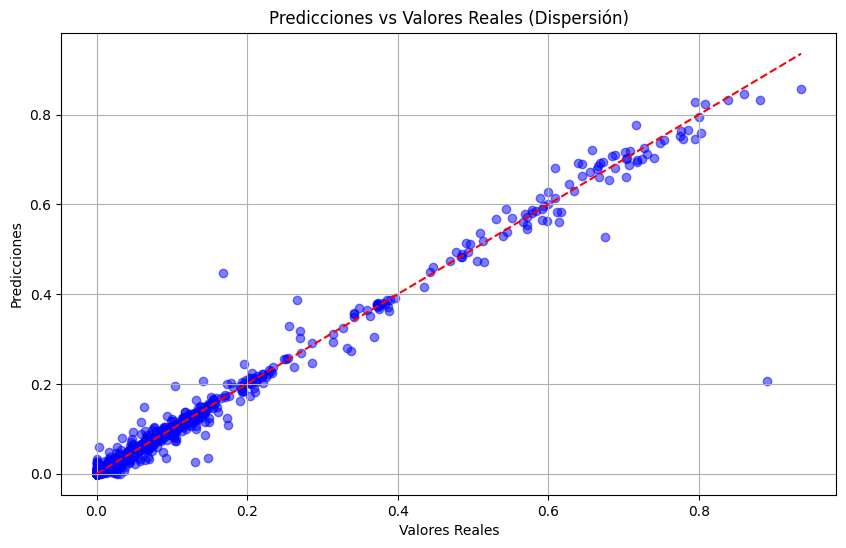

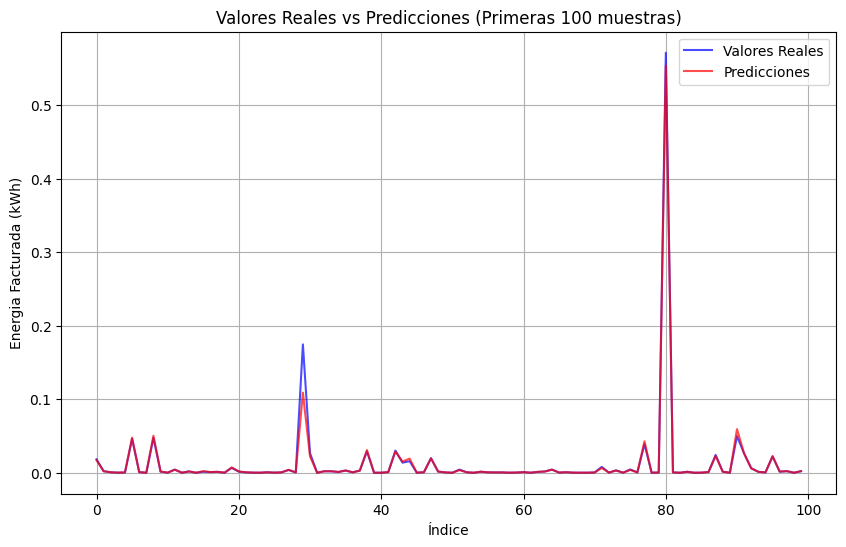

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Crear gráfico de dispersión
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicciones vs Valores Reales (Dispersión)")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()

y_test_30 = y_test.reset_index(drop=True)[:100]  # Primeros 30 valores reales
y_pred_30 = pd.Series(y_pred).reset_index(drop=True)[:100]  # Primeras 30 predicciones

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(y_test_30, label="Valores Reales", color='blue', alpha=0.7)
plt.plot(y_pred_30, label="Predicciones", color='red', alpha=0.7)
plt.title("Valores Reales vs Predicciones (Primeras 100 muestras)")
plt.xlabel("Índice")
plt.ylabel("Energia Facturada (kWh)")
plt.legend()
plt.grid(True)
plt.show()

Importancia de las variables:
          Variable  Importancia
4  Numero Clientes     0.635478
3    Grupo Consumo     0.250155
2          Empresa     0.073647
1           Canton     0.015943
5              Año     0.010235
0        Provincia     0.010229
6              Mes     0.004314


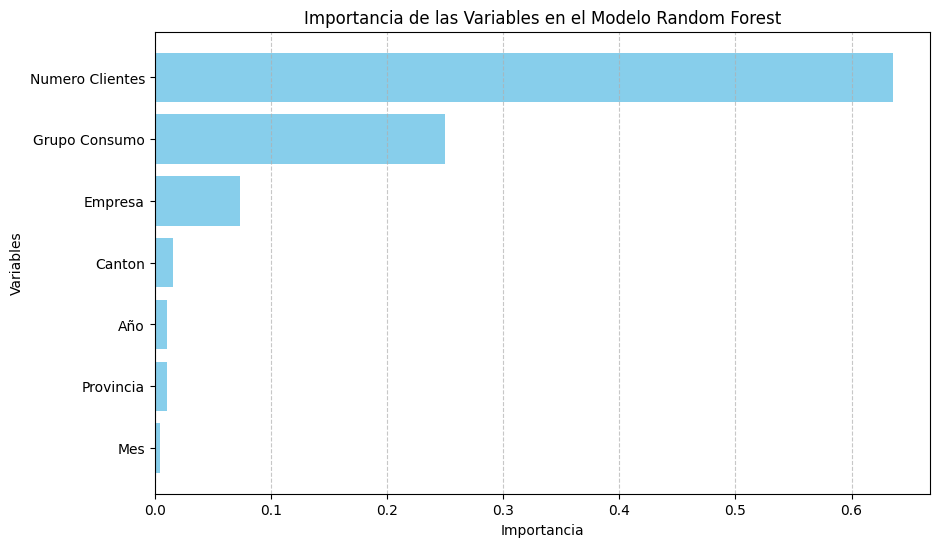

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calcular la importancia de las variables
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para organizar las importancias
features = X.columns  # Nombres de las características
importance_df = pd.DataFrame({'Variable': features, 'Importancia': feature_importances})

# Ordenar las variables por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar las importancias en consola
print("Importancia de las variables:")
print(importance_df)

# Graficar las importancias
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importancia'], color='skyblue')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las variables más importantes aparezcan arriba
plt.title("Importancia de las Variables en el Modelo Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calcular residuales
residuales = y_test - y_pred

# Identificar puntos altos (percentil 95)
umbral_alto = np.percentile(y_test, 95)  # ~0.009 kWh (según datos)
indices_altos = y_test[y_test > umbral_alto].index

# Residuales en puntos altos
residuales_altos = residuales.loc[indices_altos]
y_test_altos = y_test.loc[indices_altos]
y_pred_altos = y_pred[y_test > umbral_alto]

# Estadísticos clave
media_residual = np.mean(residuales_altos)
std_residual = np.std(residuales_altos)
max_residual = np.max(residuales_altos)
min_residual = np.min(residuales_altos)

print(f"""
Estadísticas de Residuales en Puntos Altos:
- Media: {media_residual:.6f} kWh
- Desviación estándar: {std_residual:.6f} kWh
- Máximo residual: {max_residual:.6f} kWh
- Mínimo residual: {min_residual:.6f} kWh
""")


Estadísticas de Residuales en Puntos Altos:
- Media: 0.000934 kWh
- Desviación estándar: 0.024331 kWh
- Máximo residual: 0.685003 kWh
- Mínimo residual: -0.278734 kWh



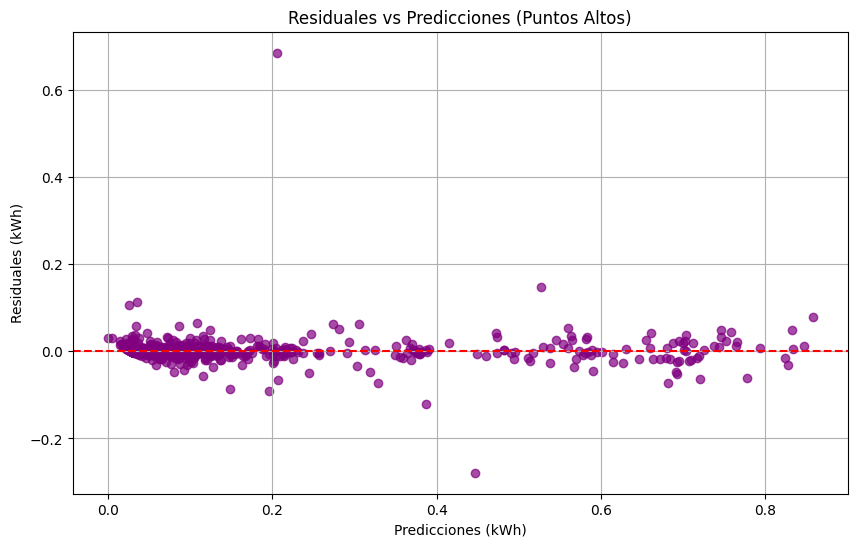

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_altos, residuales_altos, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuales vs Predicciones (Puntos Altos)")
plt.xlabel("Predicciones (kWh)")
plt.ylabel("Residuales (kWh)")
plt.grid(True)
plt.show()

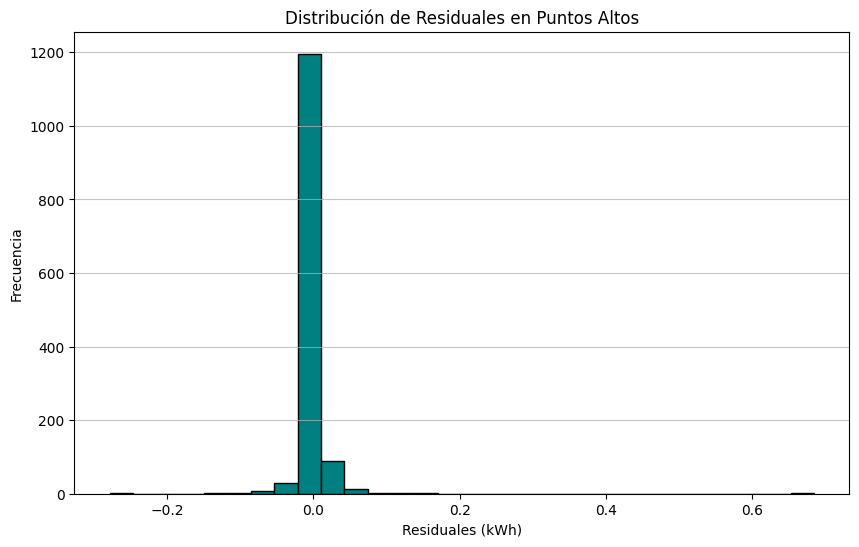

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(residuales_altos, bins=30, color='teal', edgecolor='black')
plt.title("Distribución de Residuales en Puntos Altos")
plt.xlabel("Residuales (kWh)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [14]:
# Calcular Error Porcentual Absoluto (MAPE) para puntos altos
mape_altos = np.mean(np.abs(residuales_altos / y_test_altos)) * 100
print(f"Error Porcentual Absoluto Medio (MAPE): {mape_altos:.2f}%")

Error Porcentual Absoluto Medio (MAPE): 6.95%


Se encontraron 153 valores extremos en los residuales

Muestra de 5 registros con mayores residuales:
     Provincia  Canton  Empresa  Grupo Consumo  Numero Clientes   Año  Mes  \
33          18      54       17              3         0.016086  2022    8   
124          9      85        3              2         0.002351  2018    4   
74           9      55        4              2         0.000253  2014   10   
38           9      55        4              2         0.000254  2018    2   
91           9      85        3              4         0.628277  2023    5   

     Energia_Real  Energia_Predicha  Residual  
33       0.891053          0.206050  0.685003  
124      0.674791          0.526403  0.148388  
74       0.147984          0.035613  0.112371  
38       0.131348          0.025770  0.105578  
91       0.935655          0.857400  0.078255  

Muestra de 5 registros con menores residuales:
     Provincia  Canton  Empresa  Grupo Consumo  Numero Clientes   Año  Mes  \
89          18 

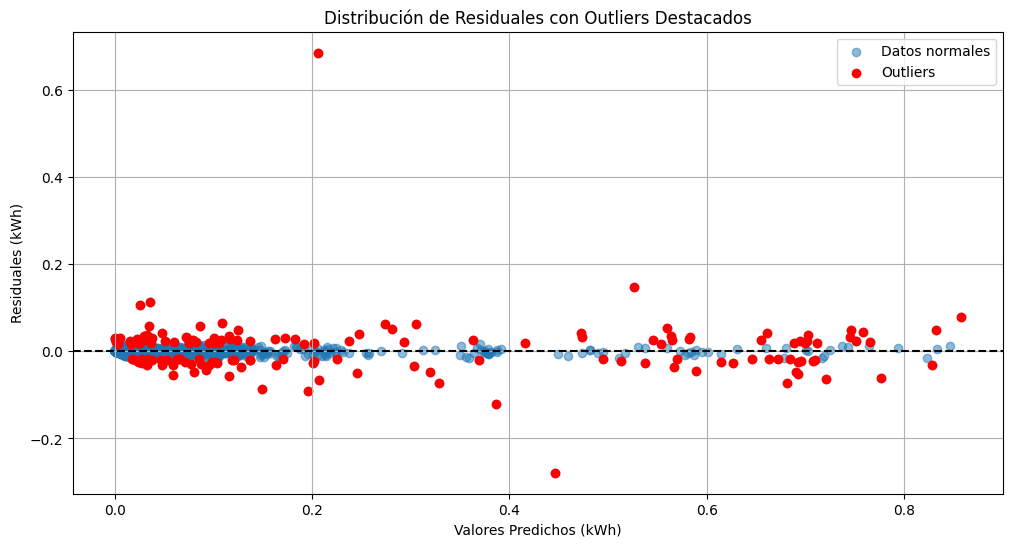


Comparación estadística:
Dataset completo:
         Residuales  Energia_Real
count  2.683000e+04  26830.000000
mean   1.481256e-05      0.007993
std    5.535201e-03      0.042008
min   -2.787339e-01      0.000000
25%   -4.561472e-05      0.000135
50%   -3.321815e-07      0.000763
75%    3.475452e-05      0.003455
max    6.850027e-01      0.935655

Subconjunto de outliers:
         Residual  Energia_Real
count  153.000000    153.000000
mean     0.004715      0.285230
std      0.071747      0.276259
min     -0.278734      0.000000
25%     -0.024286      0.057685
50%      0.017705      0.149357
75%      0.028237      0.571293
max      0.685003      0.935655


In [15]:
import numpy as np
import pandas as pd
from scipy import stats

# 1. Calcular residuales
residuales = y_test - y_pred

# 2. Identificar outliers en residuales usando Z-score
z_scores = np.abs(stats.zscore(residuales))
umbral_z = 3
outliers_residuales = np.where(z_scores > umbral_z)

# 3. Crear DataFrame con datos relevantes
df_outliers = X_test.iloc[outliers_residuales].copy()
df_outliers = df_outliers.reset_index(drop=True)

# Añadir información de energía facturada y residuales
df_outliers['Energia_Real'] = y_test.iloc[outliers_residuales].values
df_outliers['Energia_Predicha'] = y_pred[outliers_residuales]
df_outliers['Residual'] = residuales.iloc[outliers_residuales].values

# 4. Mostrar análisis de outliers
print(f"Se encontraron {len(df_outliers)} valores extremos en los residuales")
print("\nMuestra de 5 registros con mayores residuales:")
print(df_outliers.nlargest(5, 'Residual'))

print("\nMuestra de 5 registros con menores residuales:")
print(df_outliers.nsmallest(5, 'Residual'))

# 5. Visualización de outliers
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuales, alpha=0.5, label='Datos normales')
plt.scatter(df_outliers['Energia_Predicha'],
            df_outliers['Residual'],
            color='red',
            label='Outliers')
plt.axhline(0, color='black', linestyle='--')
plt.title('Distribución de Residuales con Outliers Destacados')
plt.xlabel('Valores Predichos (kWh)')
plt.ylabel('Residuales (kWh)')
plt.legend()
plt.grid(True)
plt.show()

# 6. Estadísticas comparativas
print("\nComparación estadística:")
print("Dataset completo:")
print(pd.DataFrame({
    'Residuales': residuales.describe(),
    'Energia_Real': y_test.describe()
}))

print("\nSubconjunto de outliers:")
print(df_outliers[['Residual', 'Energia_Real']].describe())